In [ ]:
import matplotlib.image as img
from matplotlib import pyplot as plt
import numpy as np


TEST_IMAGE_PATH = 'monet.jpg'

(1464, 1920, 3) (1464, 1920)


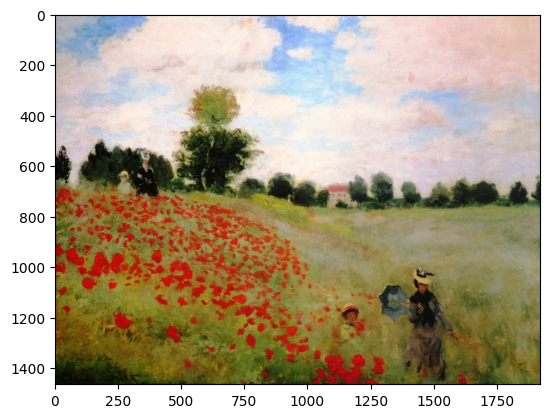

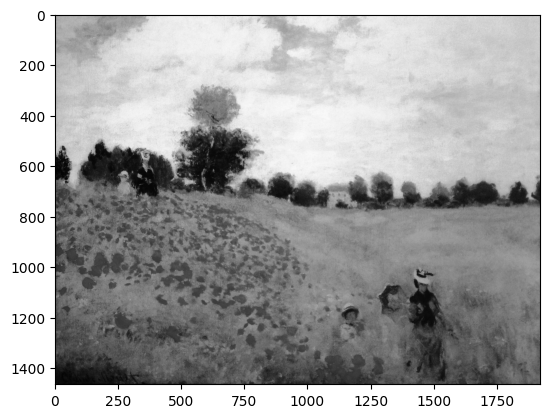

In [ ]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

image = img.imread(TEST_IMAGE_PATH)

image_grayscale = rgb2gray(image)

print(image.shape, image_grayscale.shape)

plt.imshow(image)
plt.show()

plt.imshow(image_grayscale, cmap=plt.get_cmap('gray'))

plt.show()



(1464, 1464) (1464,) (1920, 1920)
True


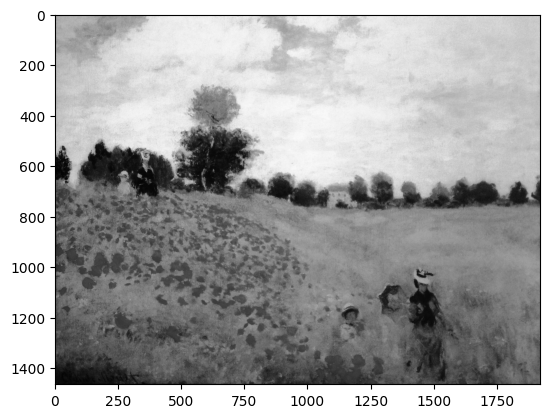

In [ ]:
def svd_reconstruct(U, S, Vh, num_eigen_values=None):
    rank = S.size
    S_partial = np.copy(S)
    if num_eigen_values is not None:
        S_partial[num_eigen_values:] = 0


    return U[:, :rank] @ np.diag(S_partial) @ Vh[:rank, :]


U, S, Vh = np.linalg.svd(image_grayscale, full_matrices=True)

print(U.shape, S.shape, Vh.shape)

image_grayscale_reconstructed = svd_reconstruct(U, S, Vh)

print(np.allclose(image_grayscale_reconstructed, image_grayscale))

plt.imshow(image_grayscale_reconstructed, cmap=plt.get_cmap('gray'))


array([9.53118545e-01, 1.94907098e-02, 6.80418233e-03, ...,
       6.08410005e-09, 5.78937479e-09, 5.54187886e-09])

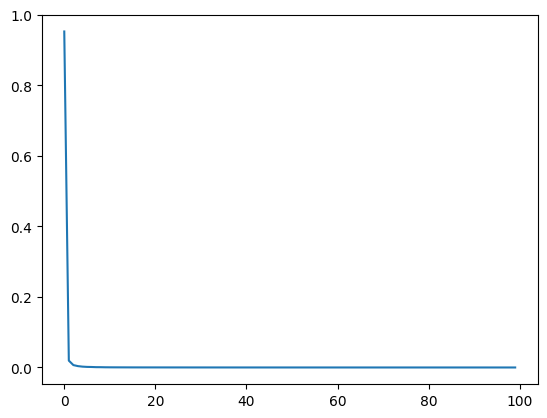

In [ ]:
# plt.plot(S)

S_normalized = np.square(S) / np.sum(np.square(S))

plt.plot(S_normalized[:100])

S_normalized


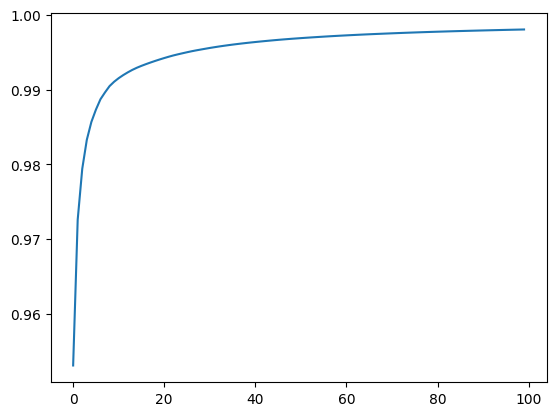

In [ ]:
plt.plot(np.cumsum(S_normalized[:100]))

In [ ]:
np.sum(np.square(S))

np.float64(72802206303.99321)

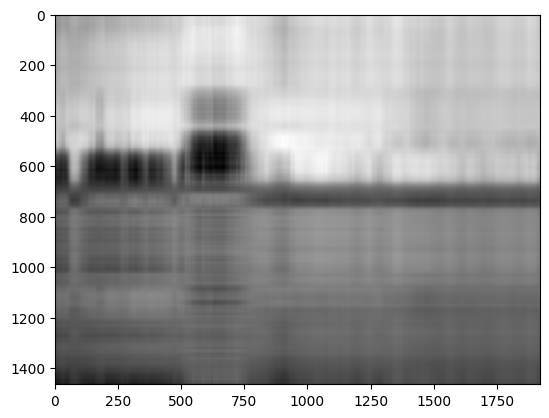

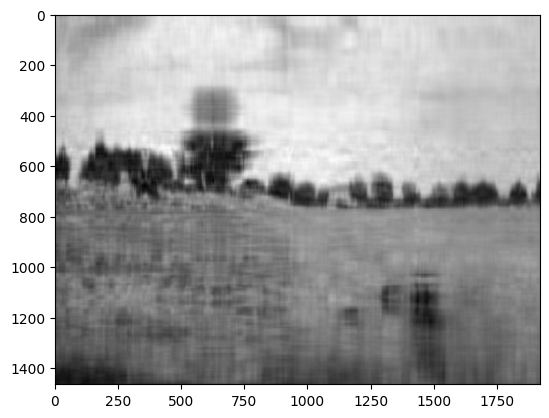

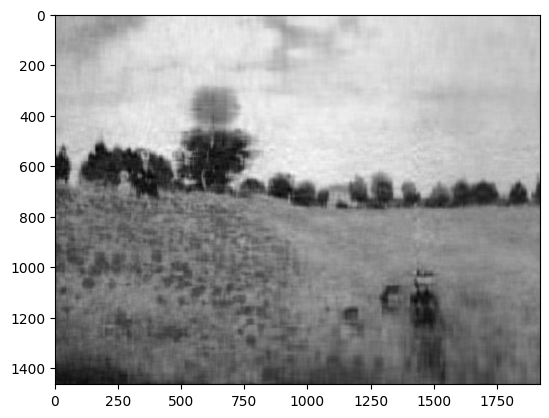

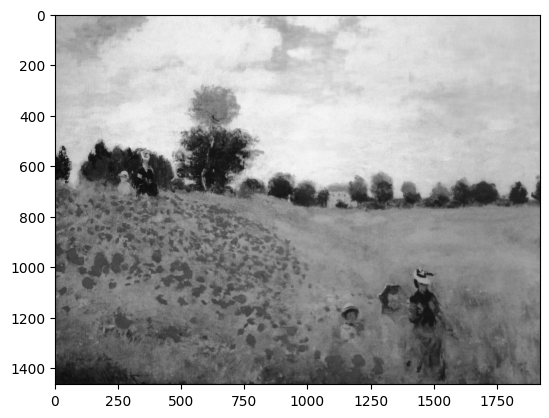

In [ ]:
reconstruction_ranks = [3, 15, 30, 200]

for r in reconstruction_ranks:
    image_grayscale_partially_reconstructed = svd_reconstruct(U, S, Vh, r)
    plt.imshow(image_grayscale_partially_reconstructed, cmap=plt.get_cmap('gray'))
    plt.show()

plt.show()


In [ ]:
im0=image[:, :,0]
im1=image[:, :,1]
im2=image[:, :,2]


U0, S0, Vh0 = np.linalg.svd(im0, full_matrices=True)
U1, S1, Vh1 = np.linalg.svd(im1, full_matrices=True)
U2, S2, Vh2 = np.linalg.svd(im2, full_matrices=True)







Index: 208


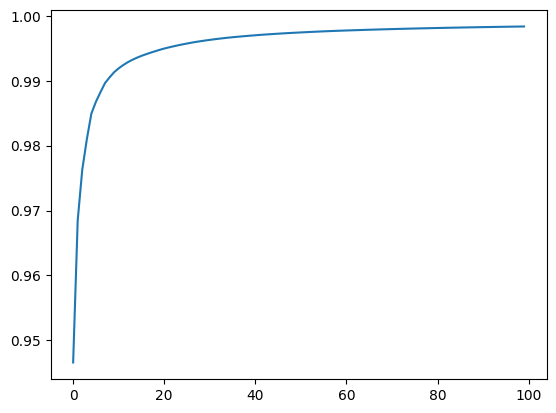

In [ ]:
S0_normalized = np.square(S0) / np.sum(np.square(S0))

plt.plot(np.cumsum(S0_normalized[:100]))
for i in range(0, len(S0_normalized)):
    if np.cumsum(S0_normalized)[i] > 0.999:
        print("Index:", i)
        break


In [ ]:
S1_normalized = np.square(S1) / np.sum(np.square(S1))
for i in range(0, len(S1_normalized)):
    if np.cumsum(S1_normalized)[i] > 0.999:
        print("Index:", i)
        break

Index: 260


In [ ]:
S2_normalized = np.square(S2) / np.sum(np.square(S2))
for i in range(0, len(S2_normalized)):
    if np.cumsum(S2_normalized)[i] > 0.999:
        print("Index:", i)
        break


Index: 312


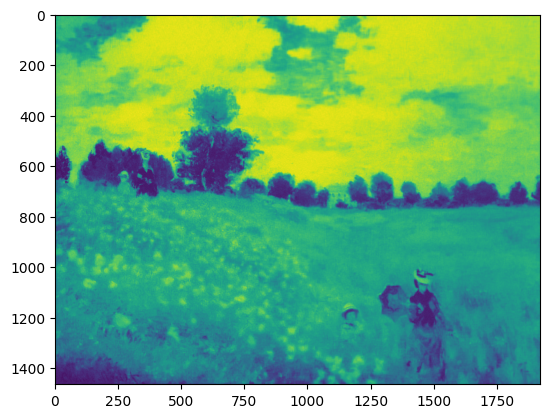

In [ ]:
reconstruction_ranks = [208]

for r in reconstruction_ranks:
    im0r = svd_reconstruct(U0, S0, Vh0, r)
    plt.imshow(im0r)
    plt.show()

plt.show()

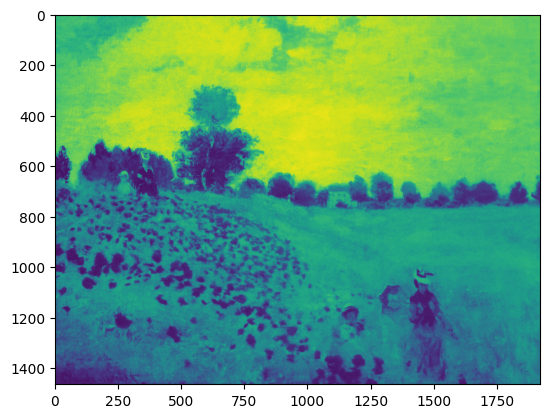

In [ ]:
reconstruction_ranks = [260]

for r in reconstruction_ranks:
    im1r = svd_reconstruct(U1, S1, Vh1, r)
    plt.imshow(im1r)
    plt.show()

plt.show()

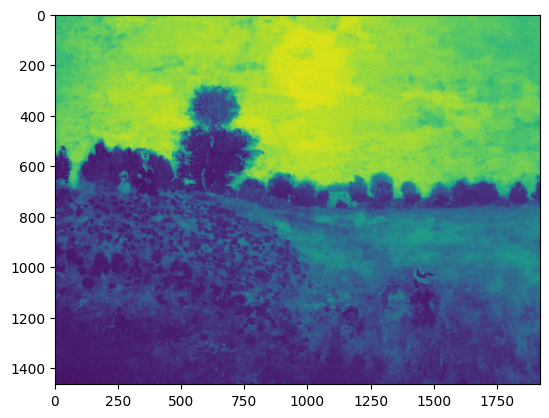

In [ ]:
reconstruction_ranks = [312]

for r in reconstruction_ranks:
    im2r = svd_reconstruct(U2, S2, Vh2, r)
    plt.imshow(im2r)
    plt.show()

plt.show()

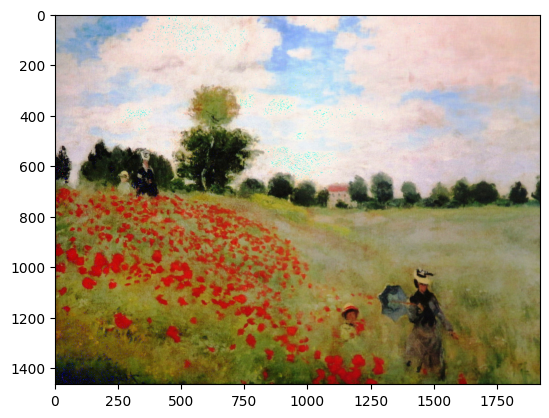

In [ ]:
imr= np.zeros_like(image)
imr[:, :, 0] = im0r
imr[:, :, 1] = im1r
imr[:, :, 2] = im2r

plt.imshow(imr)
plt.show()